# Proyecto: Simulación clásica de un gas

# Introducción

En el enfoque de dinámica molecular, intentamos comprender el comportamiento de un sistema clásico de muchas partículas simulando la trayectoria de cada partícula en el sistema.

En la práctica, esto se puede aplicar a sistemas que contienen $10^9$ partículas como máximo. El enfoque de la dinámica molecular es complementario al método más potente de Monte Carlo. 

El método de Monte Carlo se usa con los sistemas que están en equilibrio térmico con un baño de calor. Por otro lado, el enfoque de la dinámica molecular es útil para estudiar qué tan rápido en tiempo real se mueve un sistema de un estado microscópico a otro.

Consideramos una caja que contiene una colección de átomos o moléculas. Usaremos la segunda ley de Newton para calcular las posiciones y velocidades de todas las moléculas como funciones del tiempo.

### ¿Por qué una aproximación clasica?

Un tratamiento clásico puede justificarse de la siguiente manera:

Consideramos el caso del argón líquido como ejemplo. La energía requerida para excitar un átomo de argón es del orden de 10eV, mientras que la energía cinética típica del centro de masa de un átomo de argón es de 0.1eV. Por lo tanto, una colisión entre dos átomos de argón no cambiará la configuración electrónica de ninguno de los átomos. Por lo tanto, para todos los propósitos prácticos, podemos ignorar la estructura interna de los átomos de argón. 

Además, la longitud de onda de un átomo de argón que es del orden de $10^{−7}$A es mucho más pequeña que la separación entre los átomos de argón, típicamente del orden de 1A, que de nuevo justifica un tratamiento clásico.

# El potencial de  Lennard-Jones

Consideramos una caja que contiene N átomos de argón. Para simplificar, asumiremos que nuestros átomos de argón se mueven en dos dimensiones. Las ecuaciones de movimiento del i-ésimo átomo localizado en $(x_i,y_i)$ con velocidad $(v_{i,x},v_{i,y})$ son 

$$\dot{v_{i,x}}=a_{x,i},  \dot{x_i}=v_{i,x}$$


$$\dot{v_{i,y}}=a_{y,i},  \dot{y_i}=v_{i,y}$$

Cada átomo de argón experimenta la fuerza debido a todos los demás átomos de argón. Para calcular esta fuerza necesitamos determinar el potencial de interacción. 

Suponemos que el potencial de interacción entre cualquier par de átomos de argón depende solo de la distancia entre ellos

$$U=\sum\limits_{i=1}^N\sum\limits_{j=i+1}^{N}u(r_{ij})$$

El potencial de interacción $u$ entre cualesquiera dos átomos en el gas separados por una distancia $r$ que consideraremos está dado por el potencial de Lenard-Jones 

$$ u(r) = 4\epsilon \Big[ \big(\frac{\sigma}{r}\big)^{12} - \big(\frac{\sigma}{r}\big)^6 \Big] $$

![640px-Argon_dimer_potential_and_Lennard-Jones](640px-Argon_dimer_potential_and_Lennard-Jones.png)

La fuerza del átomo k sobre el átomo i es

$$\vec{f}_{k,i}=-\vec{\nabla}_{k,i}u(r_{k,i})$$

Entonces la aceleración en x será (análogo para y)

$$a_{x,i}=\frac{24\epsilon}{m}\sum\limits_{k\neq i}\frac{x_i-x_k}{r_{ki}^2}\Big[2(\frac{\sigma}{r_{ki}})^{12}-(\frac{\sigma}{r_{ki}})^6\Big]$$

Usaremos $\sigma = \epsilon = m = 1 $ (unidades reducidas por simplicidad)

# El algoritmo de Verlet

El algoritmo númerico que usaremos es el algoritmo de Verlet.

Si consideramos la expansíon de taylor "hacia adelante" y "hacia atrás" de una función f tenemos

$f(t_n+\Delta t)=f(t_n)+\Delta t\frac{df}{dt}|_{tn}+\frac{1}{2}(\Delta t)^2\frac{d^2f}{dt^2}|_{tn}+\frac{1}{3}(\Delta t)^3\frac{d^3f}{dt^3}|_{tn}+...$


$f(t_n-\Delta t)=f(t_n)-\Delta t\frac{df}{dt}|_{tn}+\frac{1}{2}(\Delta t)^2\frac{d^2f}{dt^2}|_{tn}-\frac{1}{3}(\Delta t)^3\frac{d^3f}{dt^3}|_{tn}+...$

Restamos estas expresiones

$f(t_n+\Delta t)=2f(t_n)-f(t_n-\Delta t)+(\Delta t)^2\frac{d^2f}{dt^2}|_{tn}+O(\Delta t^4)$

Observamos que el error es proporcional a $\Delta t^4$, que es menor que los errores de los métodos de Euler, Euler-Cromer y Runge-Kutta de segundo orden, por lo que este método es más preciso. 

# Velocidad de Verlet

Un algoritmo relacionado, y más comúnmente usado, es el algoritmo Verlet de velocidad, similar al método de salto de rana, excepto que la velocidad y la posición se calculan en el mismo valor de la variable de tiempo (el salto no lo hace, como su nombre indica). Esto utiliza un enfoque similar, pero incorpora explícitamente la velocidad, 

Se puede mostrar que el error en el Verlet de velocidad es del mismo orden que en el Verlet básico. 

Teniendo en cuenta que el algoritmo de velocidad no consume necesariamente más memoria, ya que no es necesario realizar un seguimiento de la velocidad en cada paso de tiempo durante la simulación (En nuestro caso si por propositos del ejercicio). 

El esquema de implementación estándar de este algoritmo es:

1. Calcular $\vec{x}(t+\Delta t)=\vec{x}(t)+\vec{v}(t)\Delta t+\frac{1}{2}\vec{a}(t)\Delta t^2$


2. Obtener $\vec{a}(t+\Delta t)$ aplicando el potencial de interacción a $\vec{x}(t+\Delta t)$


3. Calcular $\vec{v}(t+\Delta t)=\vec{v}(t)+\frac{1}{2}(\vec{a}(t)+\vec{a}(t+\Delta t))\Delta t$

Notemos que este algoritmo asume que la aceleración $\vec{a}(t+\Delta)$ solo depende de la posic

#  Consideraciones del problema 

Consideraremos el movimiento en dos dimensiones de N átomos de argón en una caja de $L \times L$ 

El potencial de interacción u entre dos átomos en el gas separado por una distancia r está dado por el potencial de Lennard-Jones. 

El algoritmo numérico que usaremos es el algoritmo de Verlet.

En este problema siempre tomaremos L impar y N un cuadrado perfecto. 

El espaciado de la red se define por
$$a=\frac{L}{\sqrt{N}}$$

Hay N celdas del área $a$ x $a$. Elegimos L y N tal que $a > 2\sigma$. 

Para simplificar, usaremos unidades reducidas $\sigma = \epsilon = m = 1$. 

Para reducir los efectos de borde, usamos condiciones de contorno periódicas. En otras palabras, la caja es efectivamente un toro (no hay bordes).



In [1]:
using LinearAlgebra

In [3]:
import Pkg; Pkg.add("Gtk")

  Updating registry at `C:\Users\Felix\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [========>                                ]  20.0 %Fetching: [================>                        ]  38.6 %.1 % Resolving package versions...
  Updating `C:\Users\Felix\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\Felix\.julia\environments\v1.1\Manifest.toml`
 [no changes]


In [4]:
import Pkg; Pkg.add("Interact")

 Resolving package versions...
  Updating `C:\Users\Felix\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\Felix\.julia\environments\v1.1\Manifest.toml`
 [no changes]


In [5]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12158908985256010418\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-3309288959501696\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12158908985256010418\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
import Pkg; Pkg.add("Plots")

  Updating registry at `C:\Users\Felix\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `C:\Users\Felix\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\Felix\.julia\environments\v1.1\Manifest.toml`
 [no changes]


In [3]:
using Plots

In [4]:
function paso_verlet(xx_0, yy_0, vx_0, vy_0, ax_0, ay_0, dt, aa, L) # donde aa es una funcion vectorial aa(xx, yy)
    
    xx_new = xx_0 + vx_0*dt + 0.5*ax_0*dt^2  
    
    yy_new = yy_0 + vy_0*dt + 0.5*ay_0*dt^2
    
    ax_new, ay_new = aa(xx_new, yy_new)
    
    vx_new = vx_0 + 0.5*(ax_0 + ax_new)*dt
    
    vy_new = vy_0 + 0.5*(ay_0 + ay_new)*dt
    
    N = length(xx_new)
    
    for i in 1:N #condiciones de frontera
    
        if xx_new[i] > L

            xx_new[i] = (xx_new[i]%L)
        end
        if xx_new[i] < 0

            xx_new[i] = (xx_new[i]%L) + L
        end
        if yy_new[i] > L

            yy_new[i] = (yy_new[i]%L)
        end
        if yy_new[i] < 0

            yy_new[i] = (yy_new[i]%L) + L
        end
        
        
    end
    
    
    return xx_new, yy_new, vx_new, vy_new
    
end
    
    
    

paso_verlet (generic function with 1 method)

In [5]:
"""
xxx[i] son las posiciones en x de las n particulas al tiempo i
xxx[i][j] es la posicion en x de la j-esima particula al tiempo i 
"""
function verlet(xx_0, yy_0, vx_0, vy_0, dt, aa, T, L) 
    
    
    ax_0 , ay_0 = aa(xx_0, yy_0)
    
    xxx = [xx_0]
    yyy = [yy_0]
    vxx = [vx_0]
    vyy = [vy_0]
    
    for i in dt:dt:T
        
        xx_new, yy_new, vx_new, vy_new = paso_verlet(xx_0, yy_0, vx_0, vy_0, ax_0, ay_0, dt, aa, L)
        
        
        push!(xxx, xx_new)
    
        push!(yyy, yy_new)

        push!(vxx, vx_new)

        push!(vyy, vy_new)
        
        xx_0 = xx_new
        
        yy_0 = yy_new
        
        vx_0 = vx_new
        
        vy_0 = vy_new
        
        
        
        
    end
    
    return xxx, yyy, vxx, vyy
    
end
# xxx[i] son las posiciones en x de las n particulas al tiempo i
# xxx[i][j] es la posicion en x de la j-esima particula al tiempo i 

verlet

In [6]:
function distxx(i, j, xx) # La distancia que tomaremos siempre tiene que ser menor que L/2 
                          # así que tomamos la menor de las distancias sobre el toro
    
    x_ij = abs(xx[j] - xx[i])
    

    if x_ij <= L*0.5
        
        return x_ij*sign(xx[j] - xx[i])
        
    end
    
    if x_ij > L*0.5
       
        x_ij = x_ij*sign(xx[j] - xx[i]) - sign(x_ij)*L
        
        return x_ij
        
    end


end

distxx (generic function with 1 method)

In [7]:
function distyy(i, j, yy)  # La distancia que tomaremos siempre tiene que ser menor que L/2 
                           # así que tomamos la menor de las distancias sobre el toro
    y_ij = abs(yy[j] - yy[i])
    

    if y_ij <= L*0.5
        
        return y_ij*sign(yy[j] - yy[i])
        
    end
    
    if y_ij > L*0.5
       
        y_ij = y_ij*sign(yy[j] - yy[i]) - sign(yy[j] - yy[i])*L
        
        return y_ij
        
    end


end

distyy (generic function with 1 method)

In [8]:
R(k, i, xx, yy) = norm([distxx(k, i, xx), distyy(k, i, yy) ])

R (generic function with 1 method)

In [61]:
function ayi(xx, yy, i)
N = length(yy)
    tol=0.01
    ayi = 24 * sum( [ distyy(k, i, yy) / (R(k, i, xx, yy)^2+tol)  *  (2/(R(k,i, xx, yy)^12+tol)  - 1/(R(k,i, xx, yy)^6+tol) )  for k in 1:N if k != i ])
    return ayi
end

ayi (generic function with 1 method)

In [62]:
function axi(xx, yy, i)
N = length(yy)
   tol=0.01
    axi = 24 * sum( [ distxx(k, i, xx) / (R(k, i, xx, yy)^2+tol)  * (2/(R(k,i, xx, yy)^12+tol)  - 1/(R(k,i, xx, yy)^6+tol))  for k in 1:N if k != i ])
    return axi
end

axi (generic function with 1 method)

In [63]:
function aa(xx, yy)
   
  ax =  [axi(xx, yy, i) for i in 1:length(xx) ]
  ay =  [ayi(xx, yy, i) for i in 1:length(yy) ]
    
    return ax, ay
end

aa (generic function with 1 method)

In [64]:
function cond_ini(L,N)
    n = sqrt(N)
    a = L / n
    
    xx = []
    
    yy = []
    
    for i in 0:n-1
        for j in 0:n-1
            
            x = i*a + a/2
            
            y = j*a + a/2
            
            push!(xx, x)
            
            push!(yy, y)
            
        end
    end
    
    return xx, yy 
    
end

cond_ini (generic function with 1 method)

In [65]:
function cond_ran(L, N)
    
    n = sqrt(N)
    a = L / n
    xx, yy = cond_ini(L, N)
    
    for i in 1:N
        
        r = (rand()* a/4)- (rand()* a/4)
        
        xx[i] = xx[i] + r
        
    end
    
    for j in 1:N
        
        r = (rand()* a/4)- (rand()* a/4)
        
        yy[j] = yy[j] + r
        
    end
    
    return xx, yy
    
end

cond_ran (generic function with 1 method)

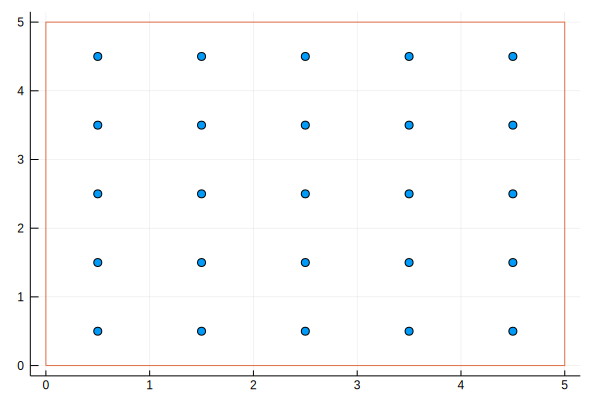

In [66]:
L33 = 5
N33 = 25

xx33, yy33 = cond_ini(L33, N33)
p = plot(leg=false)
scatter!(xx33, yy33)
plot!([0,L33,L33,0,0],[0,0,L33,L33,0])



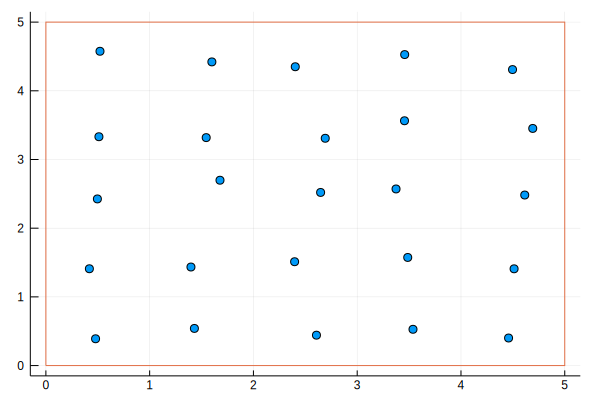

In [67]:
xx44, yy44 = cond_ran(L33, N33)
p = plot(leg=false)
scatter!(xx44, yy44)
plot!([0,L33,L33,0,0],[0,0,L33,L33,0])



In [68]:
#Condiciones Iniciales

L = 9.0 #siempre impar
N = 3^2  #perfect square
α = L/sqrt(N)  #mayor a 2;
dt = 0.002
T = 20
v0 = 10

#Posiciones iniciales (cond_ini)para orden (cond_ran) para semidesorden

xx_0, yy_0 = cond_ran(L, N)

#Velocidades iniciales aleatoria de magnitud v0
vx_0 =[ rand(0:0.0001:v0)*(2*rand(Bool)-1) for i in 1:N]
vy_0 =[ sqrt(v0^2-vx_0[i]^2)*(2*rand(Bool)-1) for i in 1:N] 

#Aplicamos el método verlet
xxx, yyy, vxx, vyy = verlet(xx_0, yy_0, vx_0, vy_0, dt, aa, T, L);






In [69]:
Mx = reduce(hcat,xxx)
My = reduce(hcat,yyy)

9×10001 Array{Any,2}:
 1.47201  1.45263  1.43324  1.41385  1.39446  …  8.63763   8.70627   8.77491 
 4.55424  4.57403  4.59382  4.61361  4.63341     4.99737   4.99877   5.00017 
 7.77068  7.75543  7.74017  7.72492  7.70966     7.3273    7.31497   7.30264 
 1.49616  1.50873  1.5213   1.53387  1.54644     2.49898   2.42406   2.34913 
 3.8507   3.83986  3.82901  3.81817  3.80732     0.633214  0.694979  0.756742
 7.11303  7.13035  7.14767  7.16499  7.18231  …  7.85724   7.76877   7.67712 
 1.41211  1.39833  1.38454  1.37076  1.35698     2.65374   2.67379   2.68786 
 4.36368  4.34543  4.32718  4.30894  4.29069     3.03866   3.04399   3.05529 
 7.24275  7.23228  7.22181  7.21134  7.20086     7.91598   7.93018   7.94757 

In [70]:

anim = @animate for i in 1:size(Mx,2)#, j in 1:N

    XX = [Mx[j,i] for j in 1:N]
    YY = [My[j,i] for j in 1:N]
    scatter!(XX, YY, lims=(-1,L+1), ms=8, leg=false, m=:o, aspect_ratio=1)
#end
    
end

#frames = trunc(Int, 1/dt) # para animación en tiempo real
gif(anim, "Gas_fps30.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = C:\Users\Felix\anim_fps30.gif
└ @ Plots C:\Users\Felix\.julia\packages\Plots\47Tik\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\Felix\\anim_fps30.gif")

In [ ]:
for i in 1:size(Mx,2)
 
p =plot([0,0,L,L,0],[0,L,L,0,0], linewidth=:3)

for j in 1:N
XX = [Mx[j,i]]
YY = [My[j,i]]


plot!(XX, YY, lims=(-1,L+1), ms=8, leg=false, m=:o, aspect_ratio=1)

end
@show p
end


In [ ]:
plot([0,0,L,L,0],[0,L,L,0,0], linewidth=:3)

# for j in 1:N
XX = [Mx[1,i]]
YY = [My[1,i]]
    
anim = @animate for i in 1:size(Mx,2)
    plot(...)
    plot!(XX, YY, lims=(-1,L+1), ms=8, leg=false, m=:o, aspect_ratio=1)
end
gif(anim, "/tmp/anim_fps15.gif", fps = 15)
gif(anim, "/tmp/anim_fps30.gif", fps = 30)

In [ ]:
plot([0,0,L,L,0],[0,L,L,0,0], linewidth=:3)
#for i in 1:N
XX = [Mx[1,1]]
YY = [My[1,1]]
    
anim = @animate for i in 1:size(Mx,2)
    plot!(XX, YY, lims=(-1,L+1), ms=8, leg=false, m=:o, aspect_ratio=1)
end
#end

# Algunas cosas que se pueden hacer con estos datos

### Teorema de equipartición de energía

La idea central de la equipartición es que, en equilibrio térmico, la energía se reparte en partes iguales entre sus varias formas

$$k_BT=\frac{m}{2N}\sum\limits_{i=1}^N(v_{i,x}^2+v_{i,y}^2)$$


Podemos graficar T como función del tiempo y ver si existe una temperatura de equilibrio

### Distribución de Maxwell-Boltzmann

Matemáticamente la distribución de Maxwell-Boltzmann es la distribución de una variable aleatoria escalar $X=\sqrt{X_1^2+X_2^2+X_3^2}$  combinación de otras tres variables aleatorias $X_i$ cada una de las cuales se distribuye según una distribución normal 

Físicamente el módulo de la velocidad de una molécula $v$ es igual a la raíz de la suma cuadrados de las velocidades coordenadas de la partícula y como cada una de ellas siguen distribuciones gausianas entonces $v$ debe seguir una distribución de Maxwell-Boltzmann explícitamente:

$$P_{Maxwell}(v)=C\frac{v^2}{k_BT}e^{-\frac{mv^2}{2k_BT}}$$

Podemos de la distribución podemos deducir la temperatura dada por

$$k_BT=mv_{pico}^2$$

# Referencias

Yoshitsugu, O. (2017). Perspectives on statistical thermodynamics. Cambridge, United Kingdom: Cambridge University Press.

Badis, Y. (2016). Computational Physics: An Introduction to Monte Carlo Simulations of Matrix Field Theory. Recuperado de https://arxiv.org/pdf/1506.02567.pdf

Wikipedia contributors. (2019, 21 enero). Verlet integration - Wikipedia. Recuperado 25 enero, 2019, de https://en.wikipedia.org/wiki/Verlet_integration

Colaboradores de Wikipedia. (2019, 19 enero). Distribución de Boltzmann - Wikipedia, la enciclopedia libre. Recuperado 25 enero, 2019, de https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Boltzmann